In [37]:
import sklearn
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

### Bagging(배깅) - Bootstrap aggregating

In [38]:
#oob(=out of bag) : 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100, 
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [39]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.962
테스트 세트 정확도: 0.958
OOB 샘플의 정확도: 0.948


In [40]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, 
                            n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

In [41]:
len(bagging.estimators_)

5

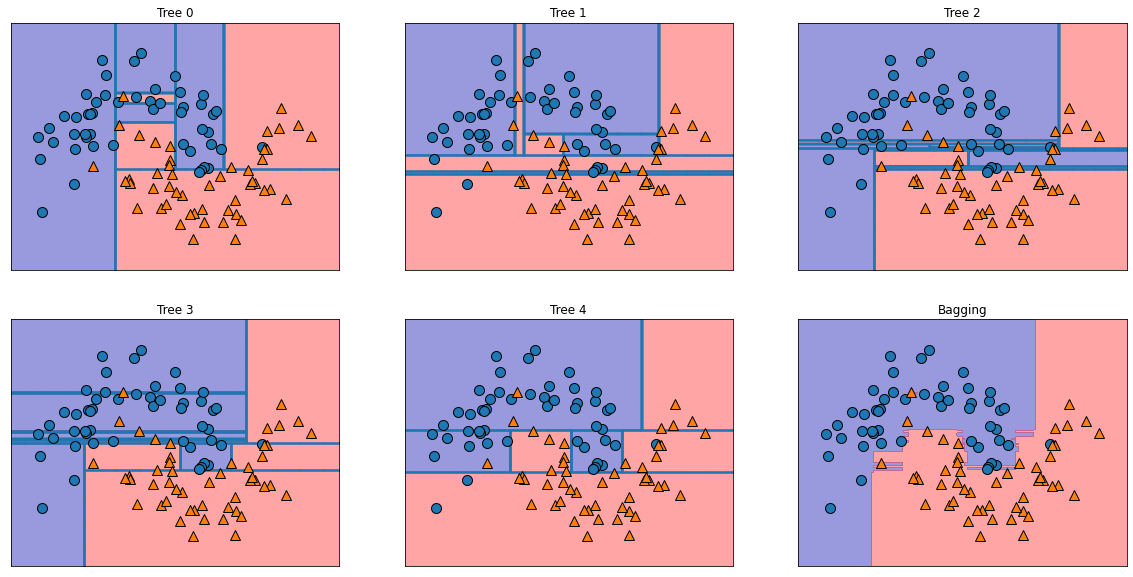

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [43]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, 
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.948


### ExtraTrees
- 후보 특성을 무작위로 분할한 다음 최적의 분할을 탐색
- Random Forest는 splitter = "best"이다. -> "random"으로 하면 엑스트라 트리

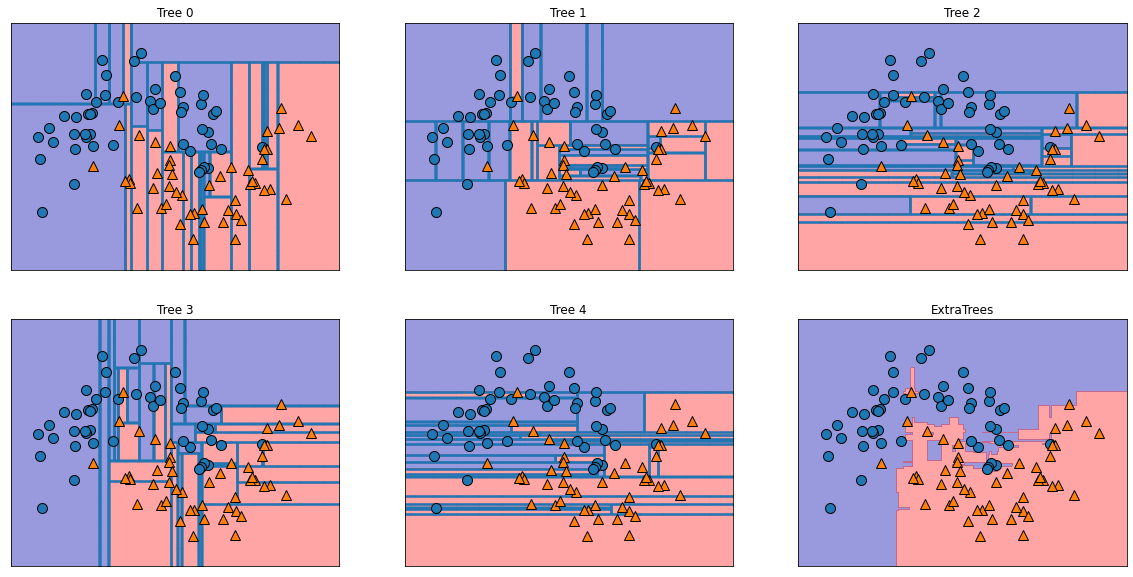

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("ExtraTrees")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [45]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


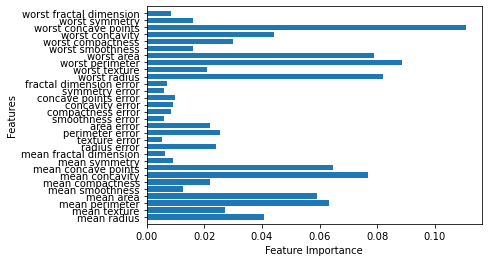

In [46]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)
plt.show()